In [55]:
#Importing the appropriate libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

In [2]:
#Reading in the data
df = pd.read_csv(r"C:\Users\PERSONAL\Desktop\Utiva\Darlytics\Python\loan_data.csv")

## Data Cleaning

In [3]:
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1347,360.43,10.434116,22.09,677,6713.041667,13846,71.0,2,0,1,0
1,1,debt_consolidation,0.1324,253.58,11.835009,9.16,662,4298.000000,5122,18.2,2,1,0,0
2,1,debt_consolidation,0.0859,316.11,10.933107,15.49,767,6519.958333,6068,16.7,0,0,0,0


In [4]:
df.tail(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9565,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9566,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9567,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9.568000e+03,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.804766,0.122645,319.181363,10.931974,12.606500,710.856605,4561.247614,1.690459e+04,46.791961,1.578700,0.163775,0.062082,0.160013
std,0.396402,0.026853,207.043337,0.614915,6.886042,37.981281,2497.890561,3.376556e+04,29.022194,2.201008,0.546410,0.262081,0.366637
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.207500,682.000000,2820.000000,3.183750e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.927556,12.665000,707.000000,4139.958333,8.593000e+03,46.250000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.995000,11.289832,17.952500,737.000000,5730.000000,1.821225e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9568.0,0.804766,0.396402,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9568.0,0.122645,0.026853,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9568.0,319.181363,207.043337,15.670000,163.770000,268.950000,432.995000,9.401400e+02
log.annual.inc,9568.0,10.931974,0.614915,7.547502,10.558414,10.927556,11.289832,1.452835e+01
dti,9568.0,12.606500,6.886042,0.000000,7.207500,12.665000,17.952500,2.996000e+01
fico,9568.0,710.856605,37.981281,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9568.0,4561.247614,2497.890561,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9568.0,16904.593018,33765.562633,0.000000,3183.750000,8593.000000,18212.250000,1.207359e+06
revol.util,9568.0,46.791961,29.022194,0.000000,22.600000,46.250000,70.900000,1.190000e+02
inq.last.6mths,9568.0,1.578700,2.201008,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
# percentage of missing values
df.isnull().sum()/len(df) 

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9568 non-null   int64  
 1   purpose            9568 non-null   object 
 2   int.rate           9568 non-null   float64
 3   installment        9568 non-null   float64
 4   log.annual.inc     9568 non-null   float64
 5   dti                9568 non-null   float64
 6   fico               9568 non-null   int64  
 7   days.with.cr.line  9568 non-null   float64
 8   revol.bal          9568 non-null   int64  
 9   revol.util         9568 non-null   float64
 10  inq.last.6mths     9568 non-null   int64  
 11  delinq.2yrs        9568 non-null   int64  
 12  pub.rec            9568 non-null   int64  
 13  not.fully.paid     9568 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
#Checking for dupicates
df.duplicated().sum()

0

In [12]:
df.rename(columns={'int.rate': 'Int_rate', 'installment': 'Installment', 
                   'log.annual.inc': 'Log_Income', 'dti': 'DTI', 'fico': 'FICO', 
                   'days.with.cr.line': 'Days_with_cr_line', 'revol.bal': 'Revol_bal', 'revol.util': 'Revol_util',
                   'inq.last.6mths': 'Inquires(6 months)', 'delinq.2yrs': 'Delinq(2 yrs)', 'pub.rec': 'Pub_rec', 
                   'not.fully.paid': 'Not_fully_paid', 'purpose': 'Purpose'}, inplace=True)

In [13]:
df.shape

(9568, 14)

## EDA

<Axes: xlabel='Purpose', ylabel='count'>

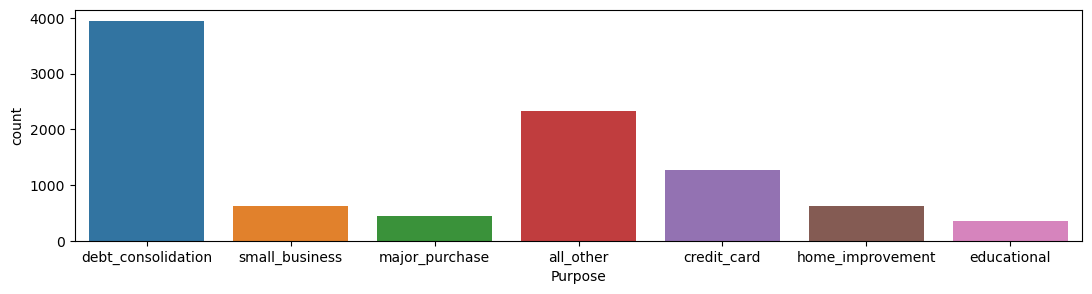

In [32]:
#Counting the number of borrowers per purpose
plt.figure(figsize=(13,3))
sns.countplot(data=df, x='Purpose')

<Axes: xlabel='Purpose', ylabel='count'>

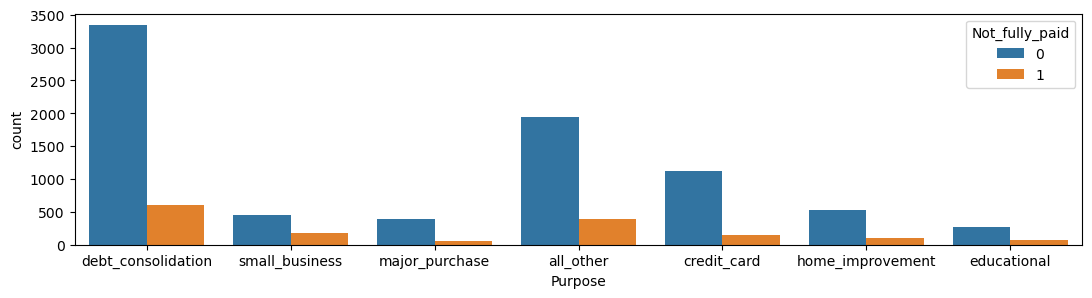

In [15]:
#Checking the number of borrowers and as well hueing the number of those who have fully paid and otherwise
plt.figure(figsize=(13,3))
sns.countplot(data=df, x='Purpose', hue='Not_fully_paid')

<Figure size 100x200 with 0 Axes>

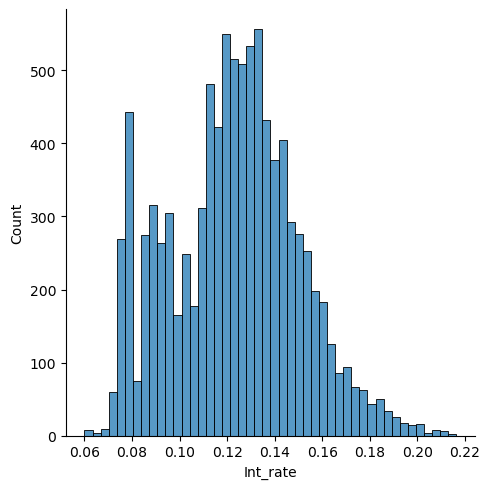

In [16]:
plt.figure(figsize=(1,2))
sns.displot(data = df, x = 'Int_rate')

<Figure size 100x200 with 0 Axes>

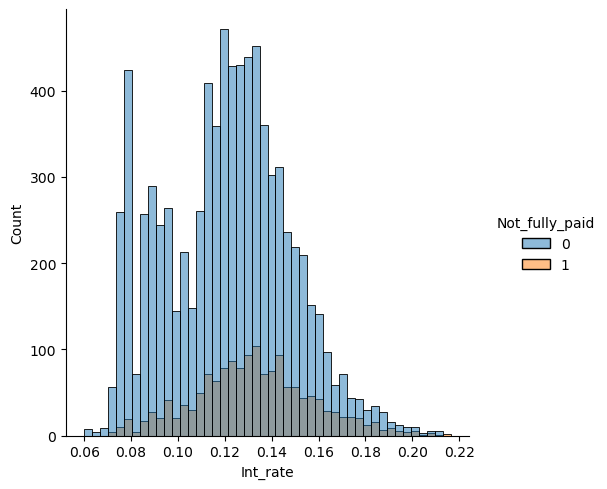

In [17]:
#Checking the distribution of those who have fully paid with regards the interest rate
#This could indicate if the interest rate is a factor to some people not fully paying back their loans
plt.figure(figsize=(1,2))
sns.displot(data = df, x = 'Int_rate', hue='Not_fully_paid')

In [18]:
#Number of people who have fully paid back to those who haven't
df['Not_fully_paid'].value_counts()

0    8037
1    1531
Name: Not_fully_paid, dtype: int64

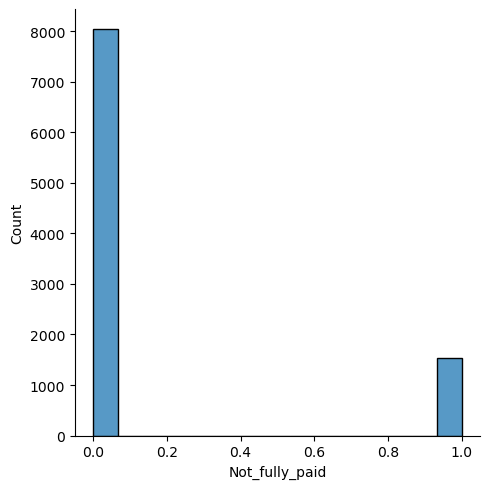

In [23]:
#Visualizing the above code
sns.displot(data = df, x = 'Not_fully_paid')

In [19]:
#Checking the number of people who met the credit conditions
df['credit.policy'].value_counts()

1    7700
0    1868
Name: credit.policy, dtype: int64

In [21]:
#Viewing the percentage of those who have fully paid back per purpose
#Small businesses have the highest percentage while major purchase have the lowest
a = df.groupby(by='Purpose').count()['Not_fully_paid']
b = df.groupby(by='Purpose').sum()['Not_fully_paid']
percent_of_purpose_fully_repaid = (b/a)*100
percent_of_purpose_fully_repaid

Purpose
all_other             16.566524
credit_card           11.596505
debt_consolidation    15.232794
educational           20.116618
home_improvement      17.038217
major_purchase        11.212815
small_business        27.786753
Name: Not_fully_paid, dtype: float64

<BarContainer object of 7 artists>

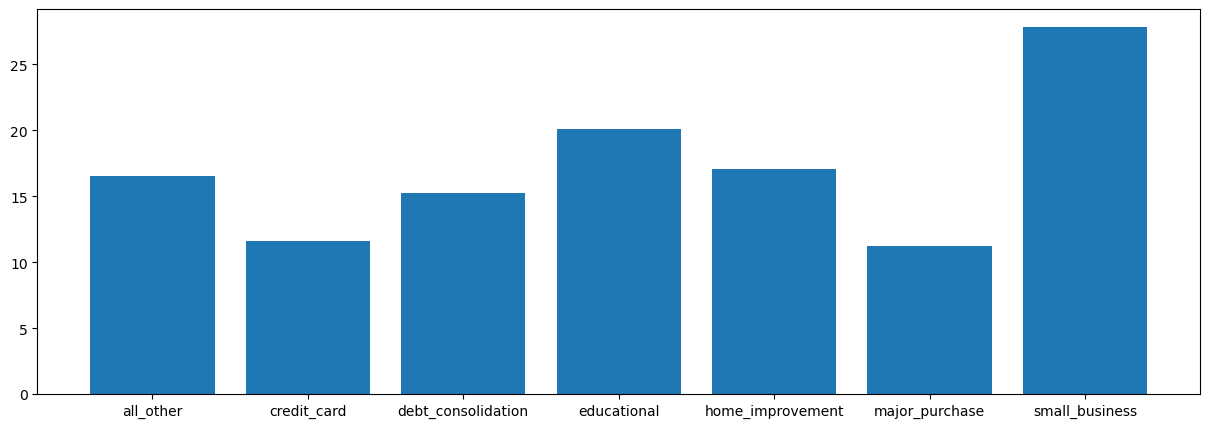

In [25]:
#Visualizing the above code
plt.figure(figsize=(15,5))
plt.bar(percent_of_purpose_fully_repaid.index, percent_of_purpose_fully_repaid.values)

<BarContainer object of 7 artists>

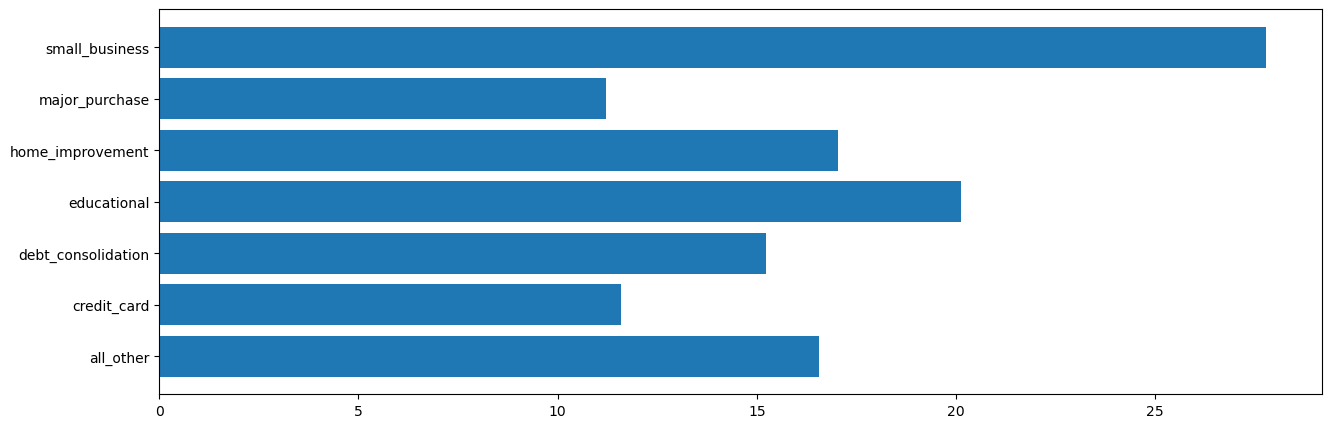

In [26]:
#Still visualizing
plt.figure(figsize=(15,5))
plt.barh(percent_of_purpose_fully_repaid.index, percent_of_purpose_fully_repaid.values)

<Axes: >

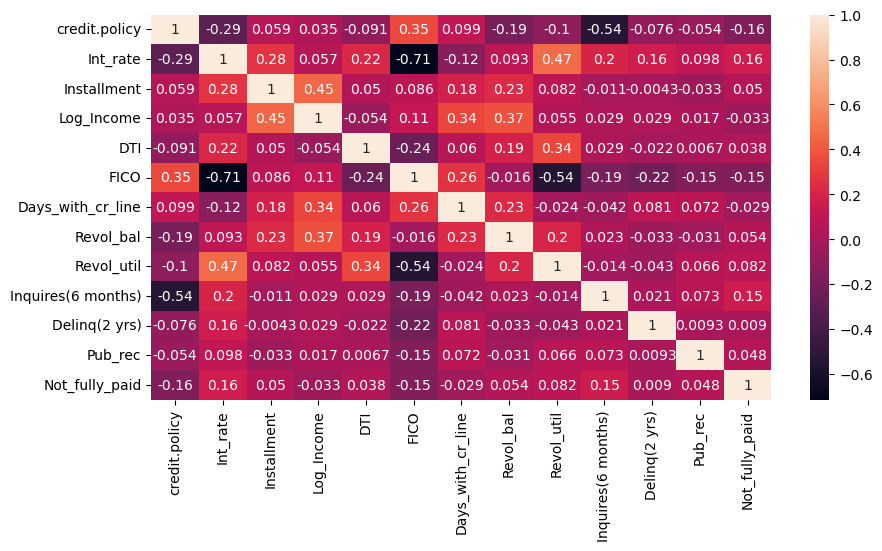

In [22]:
#Reading the relationships between the features (columns)
#Value close to +1 shows an inverse relationship while -1 shows a direct relationship
#FICO and Int rate have a -0.71, this means the lesser the FICO score, the higher the interest
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [29]:
#Average FICO score
df.groupby('Purpose').mean()['FICO']

Purpose
all_other             715.341202
credit_card           709.648928
debt_consolidation    703.875000
educational           708.282799
home_improvement      724.874204
major_purchase        722.503432
small_business        719.988691
Name: FICO, dtype: float64

In [30]:
df.groupby('Purpose').count()['FICO']

Purpose
all_other             2330
credit_card           1259
debt_consolidation    3952
educational            343
home_improvement       628
major_purchase         437
small_business         619
Name: FICO, dtype: int64

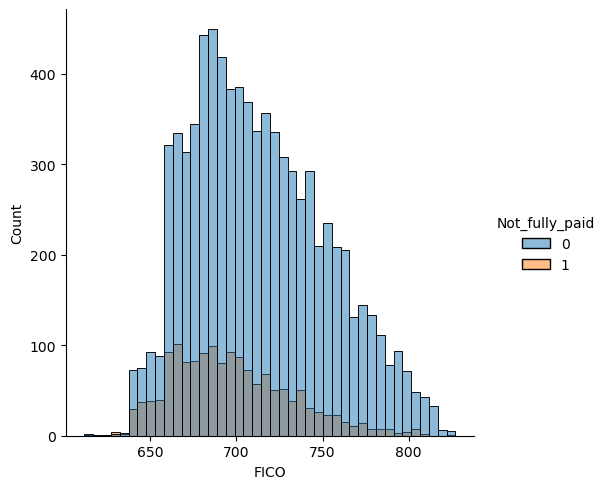

In [24]:
#Not_fully_paid has a normal distribution w.r.t the FICO score
sns.displot(data = df, x = 'FICO', hue='Not_fully_paid')

In [67]:
numerator = df.groupby('FICO').sum()['Not_fully_paid'].values
denominator = df.groupby('FICO').count()['Not_fully_paid'].values

In [69]:
fico_score_percent = (numerator/denominator) * 100
fico_score_index = df.groupby('FICO').count()['Not_fully_paid'].index

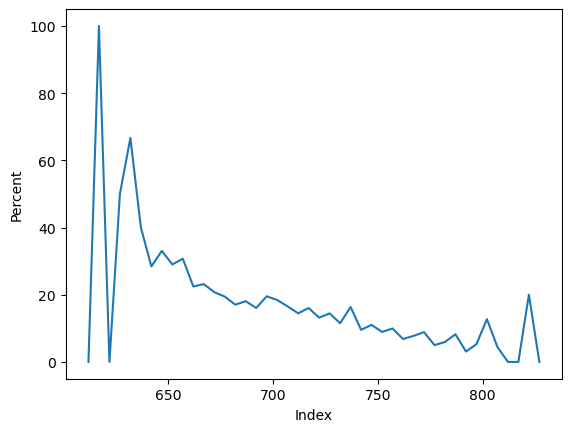

In [70]:
#This graph shows that people with FICO <650 have fully repaid their loans as compared to people with the higher FICO scores
plt.plot(fico_score_index, fico_score_percent)
plt.ylabel('Percent')
plt.xlabel('Index')
plt.show()

In [34]:
purpose_val_count = df['Purpose'].value_counts()

In [40]:
total_val = 0
for each_val in purpose_val_count:
    total_val += each_val
    
purpose_percent = (df['Purpose'].value_counts()/total_val)*100

In [41]:
purpose_percent

debt_consolidation    41.304348
all_other             24.352007
credit_card           13.158445
home_improvement       6.563545
small_business         6.469482
major_purchase         4.567308
educational            3.584866
Name: Purpose, dtype: float64

In [43]:
purp_dti = df.groupby('Purpose').mean()['DTI']
purp_int_rate = df.groupby('Purpose').mean()['Int_rate']
purp_log = df.groupby('Purpose').mean()['Log_Income']
purp_inq = df.groupby('Purpose').sum()['Inquires(6 months)']

In [46]:
purp_col = df.Purpose.unique()

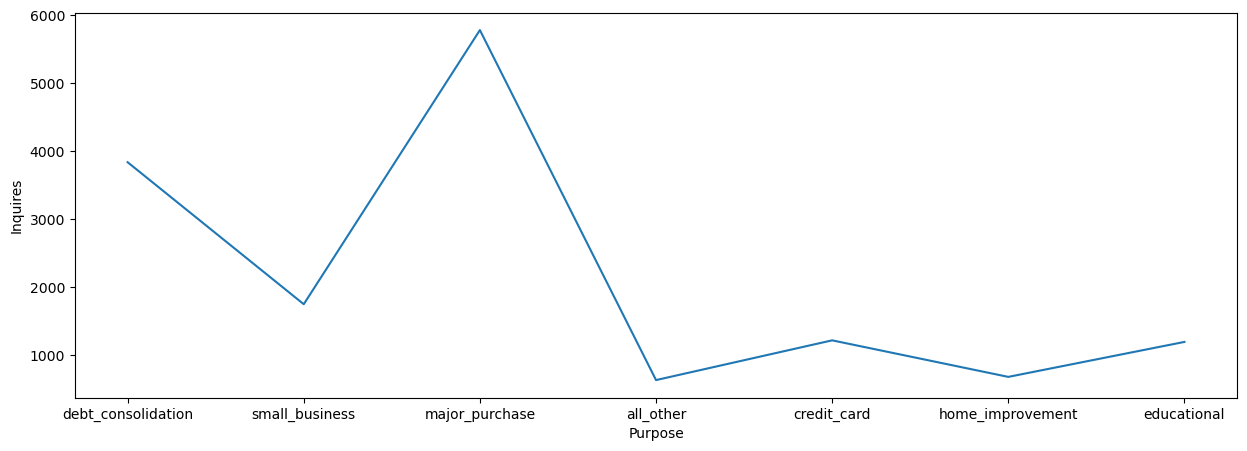

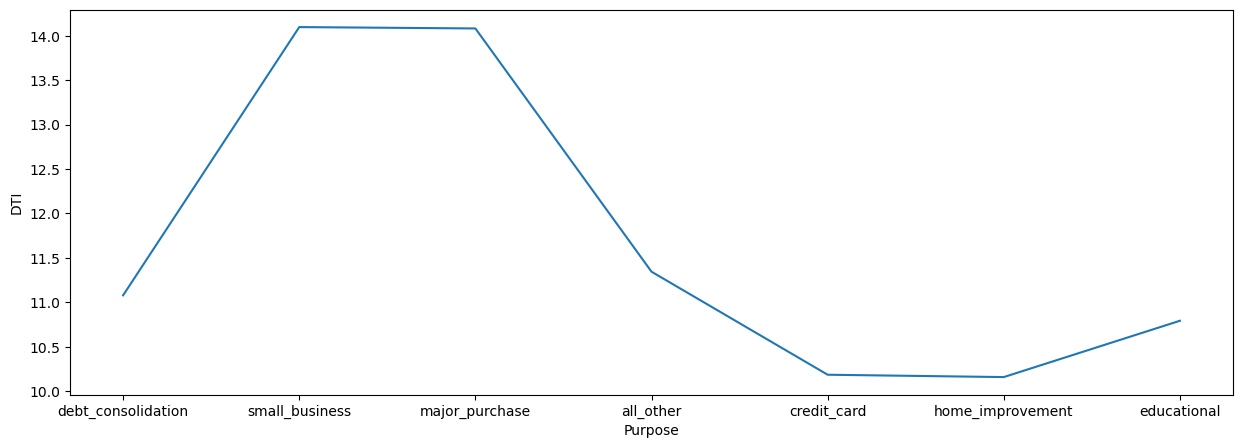

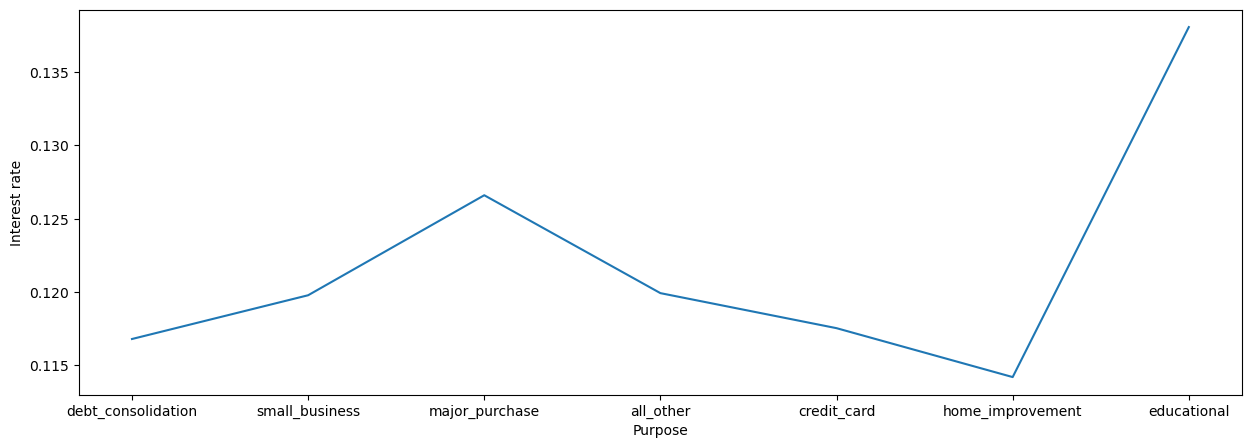

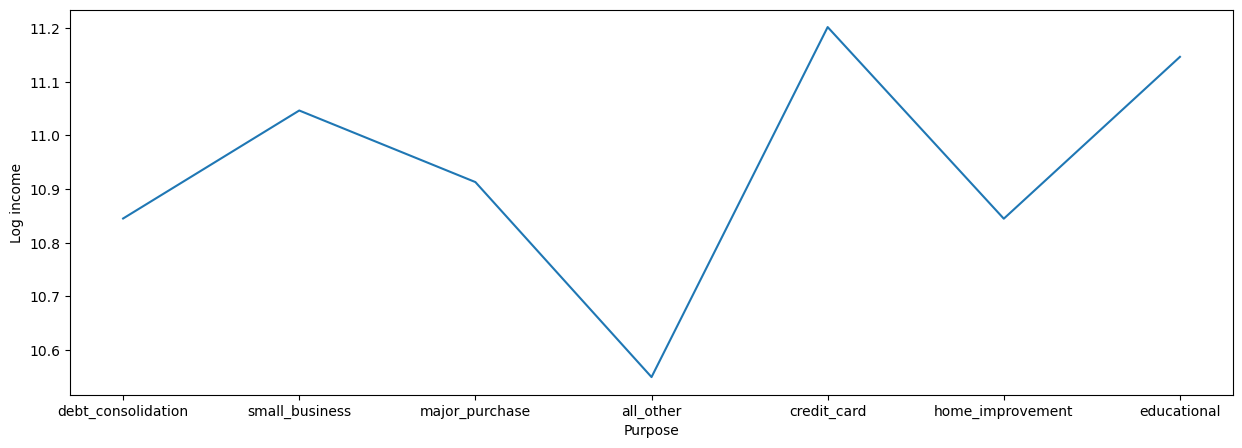

In [47]:
#The graphs below give an insight to whom and why they have not fully paid their loans
plt.figure(figsize=(15,5))
plt.plot(purp_col, purp_inq)
plt.xlabel('Purpose')
plt.ylabel('Inquires')

plt.figure(figsize=(15,5))
plt.plot(purp_col, purp_dti)
plt.xlabel('Purpose')
plt.ylabel('DTI')

plt.figure(figsize=(15,5))
plt.plot(purp_col, purp_int_rate)
plt.xlabel('Purpose')
plt.ylabel('Interest rate')


plt.figure(figsize=(15,5))
plt.plot(purp_col, purp_log)
plt.xlabel('Purpose')
plt.ylabel('Log income')
plt.show()

## Creating Model

In [49]:
#Checking categorical and numeric variables
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

In [50]:
#Creating a dummy variable for the categorical variables
#Because categorical variables are objects and ML does work with numerics alone
#The dummy variable with represent the cat_variables are numerics
dummy = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [52]:
x = dummy.drop('Not_fully_paid', axis=1) #Independent variables
y = dummy['Not_fully_paid'] #Dependent variables

In [53]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=9)

In [57]:
lr = LogisticRegression()
linr = LinearRegression()
svc = SVC()
rfc = RandomForestClassifier()
rfr = RandomForestRegressor()

In [59]:
lr.fit(x_train, y_train)

LogisticRegression()

In [60]:
linr.fit(x_train, y_train)

LinearRegression()

In [61]:
svc.fit(x_train, y_train)

SVC()

In [62]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [66]:
print(f'Logistic Regression score: {lr.score(x_val, y_val)}')
print(f'Linear Regression score: {linr.score(x_val, y_val)}')
print(f'SVC score: {svc.score(x_val, y_val)}')
print(f'RandomForest Classifier score: {rfc.score(x_val, y_val)}')
print(f'RandomForest Regressor score: {rfr.score(x_val, y_val)}')

Logistic Regression score: 0.8474399164054337
Linear Regression score: 0.051988212463716765
SVC score: 0.8474399164054337
RandomForest Classifier score: 0.8490073145245559
RandomForest Regressor score: 0.027892047278009424


In [ ]:
#RandomForest Classifiers does best in predicting whether or not a loan will be fully repaid or not